<a href="https://colab.research.google.com/github/madhugid/madhugid/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and uploading data 

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression# to apply the Logistic regression
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters
from sklearn.preprocessing import StandardScaler, OneHotEncoder # for normalization and encoding categorical variables 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

In [2]:
#creating data frame chpp
df = pd.read_csv("/content/drive/MyDrive/Data Science Project/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


ABOUT THE DATA: There are 25 Variable's:
*  ID: ID of each client
*  LIMIT_BAL: Amount of given credit in NT dollars
(includes individual and family/supplementary credit
*  SEX: Gender (1=male, 2=female)
*  EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*  MARRIAGE: Marital status (1=married, 2=single, 3=others)
*  AGE: Age in years
*  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay 
one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
*  PAY_2: Repayment status in August, 2005 (scale same as above)
*  PAY_3: Repayment status in July, 2005 (scale same as above)
*  PAY_4: Repayment status in June, 2005 (scale same as above)
*  PAY_5: Repayment status in May, 2005 (scale same as above)
*  PAY_6: Repayment status in April, 2005 (scale same as above)
*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*  default.payment.next.month: Default payment (1=yes, 0=no)

# Understanding The Data

In [3]:
df.shape

(30000, 25)

There are a total of 30000 rows and 25 columns in the data frame

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

No null values are observed in any of the feature and there are no categorical features in the data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


.


* It is observed that the repayment status is indicated as PAY_0, PAY_2, PAY_3 etc. PAY_1 column is missing. For ease of understanding we rename rename PAY_0 as PAY_1
* To make it easy for use and for understanding we will replace "default.payment.next.month" as "default_status"



In [7]:
df = df.rename(columns = {'default.payment.next.month': 'default_status',  'PAY_0': 'PAY_1' })

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
df.isna().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
default_status    0
dtype: int64

There are no null values in the data set. 

# Exploratory Data Analysis

In [10]:
df_copy = df.copy()
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


I am creating a copy of data set to ensure the original data set is not modified due to changes made for Exploratory data analysis.

In [11]:
df_copy["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [12]:
df_copy["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Here we observe that for the feature MARRIAGE there is a value 0 which doesnt indicate any thing and hence it is beteer to include this value in others so that it makes sens

In [13]:
df_copy["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [14]:
df_copy["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
df_copy['MARRIAGE'] = df_copy['MARRIAGE'].replace([0], [3])

In [16]:
df_copy['EDUCATION'] = df_copy['EDUCATION'].replace([0,6], [2,5])
df_copy["EDUCATION"].value_counts()

2    14044
1    10585
3     4917
5      331
4      123
Name: EDUCATION, dtype: int64

Here I replaced value with 0 as univserity which is frequently occuring value and replaced 5 with 6 as both represent unknown values

In [17]:
df_copy['default_status'] = df_copy['default_status'].replace([1,0], ["Yes", "No"])
df_copy['SEX'] = df_copy['SEX'].replace([1,2], ["Male", "Female"])
df_copy['EDUCATION'] = df_copy['EDUCATION'].replace([1,2,3,4,5], ["graduate school", "university","high school","others","unknown"])
df_copy['MARRIAGE'] = df_copy['MARRIAGE'].replace([1,2,3], ["Married", "Single", "Others"])
#(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#Marital status (1=married, 2=single, 3=others)

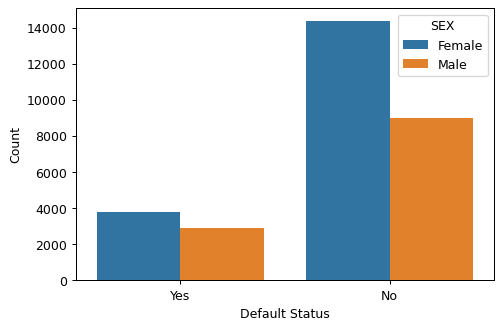

In [18]:
##Understanding default status across Gender
plt.figure(dpi=90)
plot = sns.countplot(x="default_status", hue = "SEX", data=df_copy)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()

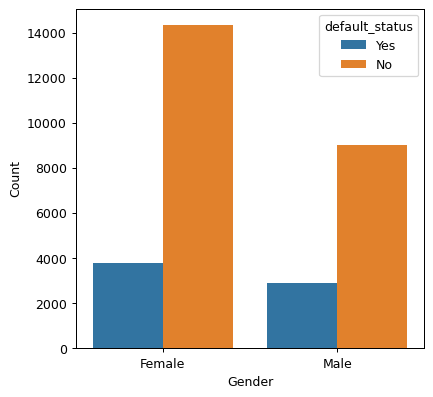

In [19]:
##Understanding default status across Gender
plt.figure(dpi=90, figsize = (5,5))
sns.countplot(x="SEX", hue = "default_status", data=df_copy)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [20]:
df_copy.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

In [21]:
round((df_copy.groupby(["SEX",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
SEX    default_status default_status                
Female No             No                       79.22
       Yes            Yes                      20.78
Male   No             No                       75.83
       Yes            Yes                      24.17

From the above table it is evident that the defaulter's percentage is comparatively high among female than among male

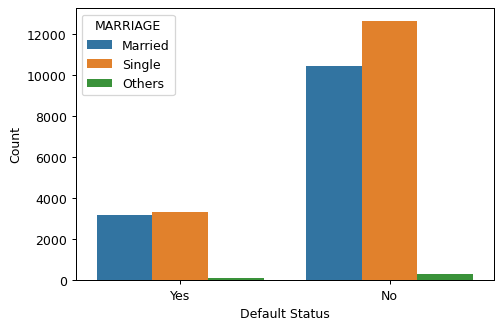

In [22]:
#Understanding default status among marriage status
plt.figure(dpi=90)
sns.countplot(x="default_status", hue = "MARRIAGE", data=df_copy)
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()

In [23]:
round((df_copy.groupby(["MARRIAGE",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
MARRIAGE default_status default_status                
Married  No             No                       76.53
         Yes            Yes                      23.47
Others   No             No                       76.39
         Yes            Yes                      23.61
Single   No             No                       79.07
         Yes            Yes                      20.93

Though the probability of default among the groups is almost same, we observe a slight higher percentage of defaulters among singles when compared with other group's

In [24]:
round((df_copy.groupby(["EDUCATION",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
EDUCATION       default_status default_status                
graduate school No             No                       80.77
                Yes            Yes                      19.23
high school     No             No                       74.84
                Yes            Yes                      25.16
others          No             No                       94.31
                Yes            Yes                       5.69
university      No             No                       76.29
                Yes            Yes                      23.71
unknown         No             No                       92.15
                Yes            Yes                       7.85

Here we can observe that among different categories, people with university qualifaction and with High School qualification has slightly higher probability to default compraratively

In [25]:
max_age = df_copy["AGE"].max()
min_age = df_copy["AGE"].min()
print(max_age, min_age)

79 21


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


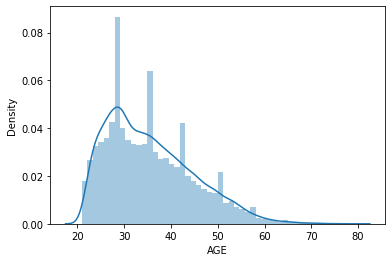

In [26]:
sns.distplot(df_copy.AGE)

21-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: AGE_BIN, dtype: int64


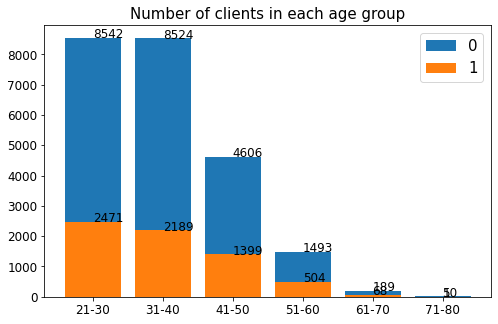

In [27]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df_copy['AGE_BIN'] = pd.cut(x=df_copy.AGE, bins=bins, labels=names, right=True)

age_cont = df_copy.AGE_BIN.value_counts()
age_0 = (df_copy.AGE_BIN[df_copy['default_status'] == "No"].value_counts())
age_1 = (df_copy.AGE_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(df_copy['AGE_BIN'].value_counts())
plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [28]:
round((df_copy.groupby(["AGE_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
AGE_BIN default_status default_status                
21-30   No             No                       77.56
        Yes            Yes                      22.44
31-40   No             No                       79.57
        Yes            Yes                      20.43
41-50   No             No                       76.70
        Yes            Yes                      23.30
51-60   No             No                       74.76
        Yes            Yes                      25.24
61-70   No             No                       73.54
        Yes            Yes                      26.46
71-80   No             No                       66.67
        Yes            Yes                      33.33



*   It can be observed that majority of credit card holders are of age below 40 years with coparatively low percentage of defaulters in thse age range.
*   It is observed that percentage of defaulters in age bracket of 71-80 are slightly high compared with other. How ever the data values for that age group is very less and it might not be a good idea to consider the high percentage of default in this particular age group



Repayment status in September, 2005 (-1=pay duly, 1=payment delay one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [29]:
df_copy["PAY_1"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

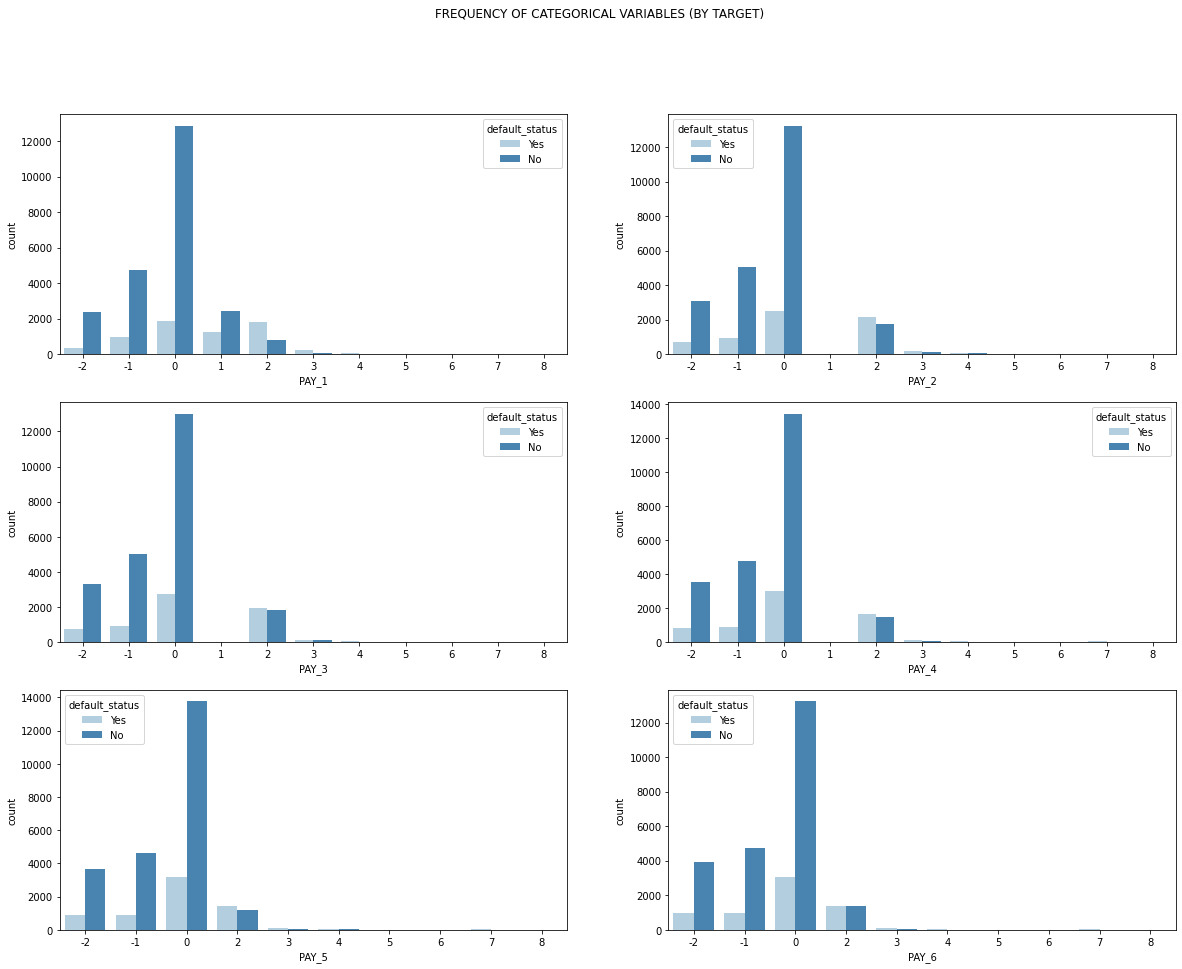

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15), facecolor='white')
fig.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x=df_copy["PAY_1"], hue="default_status", data=df_copy, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x=df_copy["PAY_2"], hue="default_status", data=df_copy, palette="Blues", ax=axes[0,1])
ax3 = sns.countplot(x=df_copy["PAY_3"], hue="default_status", data=df_copy, palette="Blues", ax=axes[1,0])
ax4 = sns.countplot(x=df_copy["PAY_4"], hue="default_status", data=df_copy, palette="Blues", ax=axes[1,1])
ax5 = sns.countplot(x=df_copy["PAY_5"], hue="default_status", data=df_copy, palette="Blues", ax=axes[2,0])
ax6 = sns.countplot(x=df_copy["PAY_6"], hue="default_status", data=df_copy, palette="Blues", ax=axes[2,1])

In [31]:
round((df_copy.groupby(["PAY_1",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
PAY_1 default_status default_status                
-2    No             No                       86.77
      Yes            Yes                      13.23
-1    No             No                       83.22
      Yes            Yes                      16.78
 0    No             No                       87.19
      Yes            Yes                      12.81
 1    No             No                       66.05
      Yes            Yes                      33.95
 2    No             No                       30.86
      Yes            Yes                      69.14
 3    No             No                       24.22
      Yes            Yes                      75.78
 4    No             No                       31.58
      Yes            Yes                      68.42
 5    No             No                       50.00
      Yes            Yes                      50.00
 6    No             No                       45.45
      Yes            Yes                      54.55
 7    No             No                       22.22
      Yes            Yes                      77.78
 8    No             No                       42.11
      Yes            Yes                      57.89

It can be inferred from the above data that with increase in payment delay by september 2005, there is increasing chance of default status 

In [32]:
round((df_copy.groupby(["PAY_2",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
PAY_2 default_status default_status                
-2    No             No                       81.73
      Yes            Yes                      18.27
-1    No             No                       84.03
      Yes            Yes                      15.97
 0    No             No                       84.09
      Yes            Yes                      15.91
 1    No             No                       82.14
      Yes            Yes                      17.86
 2    No             No                       44.39
      Yes            Yes                      55.61
 3    No             No                       38.34
      Yes            Yes                      61.66
 4    No             No                       49.49
      Yes            Yes                      50.51
 5    No             No                       40.00
      Yes            Yes                      60.00
 6    No             No                       25.00
      Yes            Yes                      75.00
 7    No             No                       40.00
      Yes            Yes                      60.00
 8    No             No                      100.00

In [33]:
round((df_copy.groupby(["PAY_3",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
PAY_3 default_status default_status                
-2    No             No                       81.47
      Yes            Yes                      18.53
-1    No             No                       84.41
      Yes            Yes                      15.59
 0    No             No                       82.55
      Yes            Yes                      17.45
 1    No             No                       75.00
      Yes            Yes                      25.00
 2    No             No                       48.44
      Yes            Yes                      51.56
 3    No             No                       42.50
      Yes            Yes                      57.50
 4    No             No                       42.11
      Yes            Yes                      57.89
 5    No             No                       42.86
      Yes            Yes                      57.14
 6    No             No                       39.13
      Yes            Yes                      60.87
 7    No             No                       18.52
      Yes            Yes                      81.48
 8    No             No                       33.33
      Yes            Yes                      66.67

In [34]:
round((df_copy.groupby(["PAY_4",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
PAY_4 default_status default_status                
-2    No             No                       80.75
      Yes            Yes                      19.25
-1    No             No                       84.10
      Yes            Yes                      15.90
 0    No             No                       81.67
      Yes            Yes                      18.33
 1    No             No                       50.00
      Yes            Yes                      50.00
 2    No             No                       47.67
      Yes            Yes                      52.33
 3    No             No                       38.89
      Yes            Yes                      61.11
 4    No             No                       33.33
      Yes            Yes                      66.67
 5    No             No                       48.57
      Yes            Yes                      51.43
 6    No             No                       60.00
      Yes            Yes                      40.00
 7    No             No                       17.24
      Yes            Yes                      82.76
 8    No             No                       50.00
      Yes            Yes                      50.00

In [35]:
round((df_copy.groupby(["PAY_5",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
PAY_5 default_status default_status                
-2    No             No                       80.31
      Yes            Yes                      19.69
-1    No             No                       83.81
      Yes            Yes                      16.19
 0    No             No                       81.15
      Yes            Yes                      18.85
 2    No             No                       45.81
      Yes            Yes                      54.19
 3    No             No                       36.52
      Yes            Yes                      63.48
 4    No             No                       39.29
      Yes            Yes                      60.71
 5    No             No                       41.18
      Yes            Yes                      58.82
 6    No             No                       25.00
      Yes            Yes                      75.00
 7    No             No                       17.24
      Yes            Yes                      82.76
 8    Yes            Yes                     100.00

In [36]:
round((df_copy.groupby(["PAY_6",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
PAY_6 default_status default_status                
-2    No             No                       79.96
      Yes            Yes                      20.04
-1    No             No                       83.01
      Yes            Yes                      16.99
 0    No             No                       81.16
      Yes            Yes                      18.84
 2    No             No                       49.35
      Yes            Yes                      50.65
 3    No             No                       35.87
      Yes            Yes                      64.13
 4    No             No                       36.73
      Yes            Yes                      63.27
 5    No             No                       46.15
      Yes            Yes                      53.85
 6    No             No                       26.32
      Yes            Yes                      73.68
 7    No             No                       17.39
      Yes            Yes                      82.61
 8    Yes            Yes                     100.00

*   It can be observed from the above data that with increase in delay in repayment there is increasing chaance of default with beyond 6 months delay has more than 50% of chance of default.
*   This parameter is significant in deciding the status of default 

In [37]:
print(df_copy["LIMIT_BAL"].min(), df_copy["LIMIT_BAL"].max())

10000.0 1000000.0


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


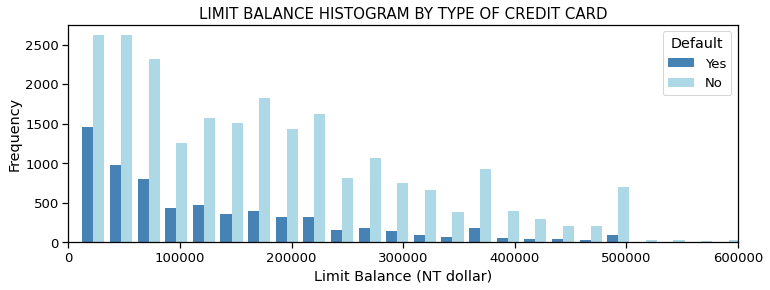

In [38]:
x1 = list(df_copy[df_copy['default_status'] == "Yes"]['LIMIT_BAL'])
x2 = list(df_copy[df_copy['default_status'] == "No"]['LIMIT_BAL'])
plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.show()

40001-50000     3365
10001-20000     1978
20001-30000     1610
70001-80000     1567
90001-100000    1048
50001-60000      825
60001-70000      731
80001-90000      651
30001-40000      230
Name: LIMIT_BAL_BIN, dtype: int64


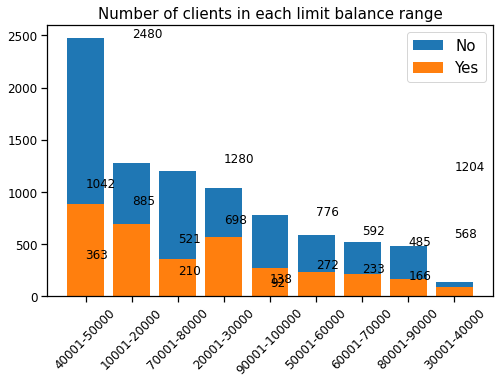

In [39]:
bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
names = ['10001-20000','20001-30000','30001-40000','40001-50000','50001-60000','60001-70000','70001-80000','80001-90000','90001-100000']
df_copy['LIMIT_BAL_BIN'] = pd.cut(x=df_copy.LIMIT_BAL, bins=bins, labels=names, right=True)
limit_bal_cont = df_copy.LIMIT_BAL_BIN.value_counts()
Limit_bal_0 = (df_copy.LIMIT_BAL_BIN[df_copy['default_status'] == "No"].value_counts())
Limit_bal_1 = (df_copy.LIMIT_BAL_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(df_copy['LIMIT_BAL_BIN'].value_counts())
plt.subplots(figsize=(8,5))
plt.bar(Limit_bal_0.index, Limit_bal_0.values, label='No')
plt.bar(Limit_bal_1.index, Limit_bal_1.values, label='Yes')
for x,y in zip(names,Limit_bal_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,Limit_bal_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12)
plt.title("Number of clients in each limit balance range", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [40]:
round((df_copy.groupby(["LIMIT_BAL_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
LIMIT_BAL_BIN default_status default_status                
10001-20000   No             No                       64.71
              Yes            Yes                      35.29
20001-30000   No             No                       64.72
              Yes            Yes                      35.28
30001-40000   No             No                       60.00
              Yes            Yes                      40.00
40001-50000   No             No                       73.70
              Yes            Yes                      26.30
50001-60000   No             No                       71.76
              Yes            Yes                      28.24
60001-70000   No             No                       71.27
              Yes            Yes                      28.73
70001-80000   No             No                       76.83
              Yes            Yes                      23.17
80001-90000   No             No                       74.50
              Yes            Yes                      25.50
90001-100000  No             No                       74.05
              Yes            Yes                      25.95

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


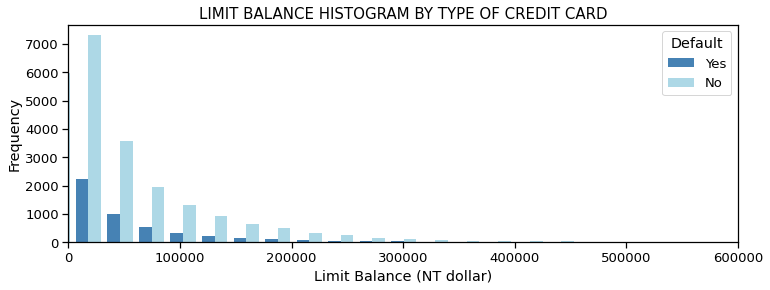

In [41]:
x1 = list(df_copy[df_copy['default_status'] == "Yes"]['BILL_AMT1'])
x2 = list(df_copy[df_copy['default_status'] == "No"]['BILL_AMT1'])
plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.show()

10001-20000     3543
20001-30000     2483
40001-50000     2089
30001-40000     1524
50001-60000     1324
60001-70000      971
70001-80000      924
80001-90000      747
90001-100000     634
Name: BILL_AMT1_BIN, dtype: int64


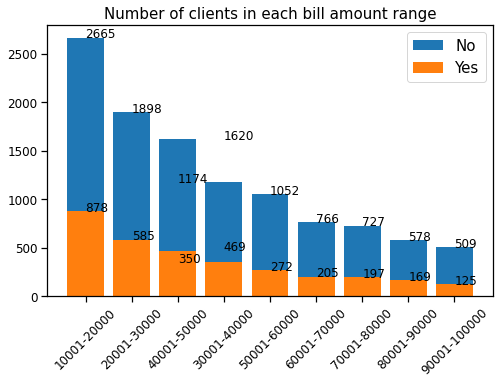

In [42]:
bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
names = ['10001-20000','20001-30000','30001-40000','40001-50000','50001-60000','60001-70000','70001-80000','80001-90000','90001-100000']
df_copy['BILL_AMT1_BIN'] = pd.cut(x=df_copy.BILL_AMT1, bins=bins, labels=names, right=True)
BILL_AMT1_count = df_copy.BILL_AMT1_BIN.value_counts()
BILL_AMT1_0 = (df_copy.BILL_AMT1_BIN[df_copy['default_status'] == "No"].value_counts())
BILL_AMT1_1 = (df_copy.BILL_AMT1_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(BILL_AMT1_count)
plt.subplots(figsize=(8,5))
plt.bar(BILL_AMT1_0.index, BILL_AMT1_0.values, label='No')
plt.bar(BILL_AMT1_1.index, BILL_AMT1_1.values, label='Yes')
for x,y in zip(names,BILL_AMT1_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,BILL_AMT1_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12)
plt.title("Number of clients in each bill amount range", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [43]:
bins = [10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
names = ['10001-20000','20001-30000','30001-40000','40001-50000','50001-60000','60001-70000','70001-80000','80001-90000','90001-100000']
df_copy['BILL_AMT2_BIN'] = pd.cut(x=df_copy.BILL_AMT2, bins=bins, labels=names, right=True)
BILL_AMT2_count = df_copy.BILL_AMT2_BIN.value_counts()
BILL_AMT2_0 = (df_copy.BILL_AMT2_BIN[df_copy['default_status'] == "No"].value_counts())
BILL_AMT2_1 = (df_copy.BILL_AMT2_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(BILL_AMT2_count)
df_copy['BILL_AMT3_BIN'] = pd.cut(x=df_copy.BILL_AMT3, bins=bins, labels=names, right=True)
BILL_AMT3_count = df_copy.BILL_AMT3_BIN.value_counts()
BILL_AMT3_0 = (df_copy.BILL_AMT3_BIN[df_copy['default_status'] == "No"].value_counts())
BILL_AMT3_1 = (df_copy.BILL_AMT3_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(BILL_AMT3_count)
df_copy['BILL_AMT4_BIN'] = pd.cut(x=df_copy.BILL_AMT4, bins=bins, labels=names, right=True)
BILL_AMT4_count = df_copy.BILL_AMT4_BIN.value_counts()
BILL_AMT4_0 = (df_copy.BILL_AMT4_BIN[df_copy['default_status'] == "No"].value_counts())
BILL_AMT4_1 = (df_copy.BILL_AMT4_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(BILL_AMT4_count)
df_copy['BILL_AMT5_BIN'] = pd.cut(x=df_copy.BILL_AMT5, bins=bins, labels=names, right=True)
BILL_AMT5_count = df_copy.BILL_AMT5_BIN.value_counts()
BILL_AMT5_0 = (df_copy.BILL_AMT5_BIN[df_copy['default_status'] == "No"].value_counts())
BILL_AMT5_1 = (df_copy.BILL_AMT5_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(BILL_AMT5_count)
df_copy['BILL_AMT6_BIN'] = pd.cut(x=df_copy.BILL_AMT6, bins=bins, labels=names, right=True)
BILL_AMT6_count = df_copy.BILL_AMT6_BIN.value_counts()
BILL_AMT6_0 = (df_copy.BILL_AMT6_BIN[df_copy['default_status'] == "No"].value_counts())
BILL_AMT6_1 = (df_copy.BILL_AMT6_BIN[df_copy['default_status'] == "Yes"].value_counts())
print(BILL_AMT6_count)

10001-20000     3527
20001-30000     2558
40001-50000     2021
30001-40000     1610
50001-60000     1297
60001-70000     1000
70001-80000      879
80001-90000      724
90001-100000     639
Name: BILL_AMT2_BIN, dtype: int64
10001-20000     3713
20001-30000     2709
40001-50000     1919
30001-40000     1655
50001-60000     1246
60001-70000      934
70001-80000      894
80001-90000      681
90001-100000     627
Name: BILL_AMT3_BIN, dtype: int64
10001-20000     4044
20001-30000     2993
40001-50000     1736
30001-40000     1618
50001-60000     1116
60001-70000      857
70001-80000      846
80001-90000      649
90001-100000     605
Name: BILL_AMT4_BIN, dtype: int64
10001-20000     4149
20001-30000     3057
40001-50000     1602
30001-40000     1538
50001-60000     1071
70001-80000      824
60001-70000      810
80001-90000      586
90001-100000     581
Name: BILL_AMT5_BIN, dtype: int64
10001-20000     3952
20001-30000     2963
40001-50000     1563
30001-40000     1510
50001-60000     1084
700

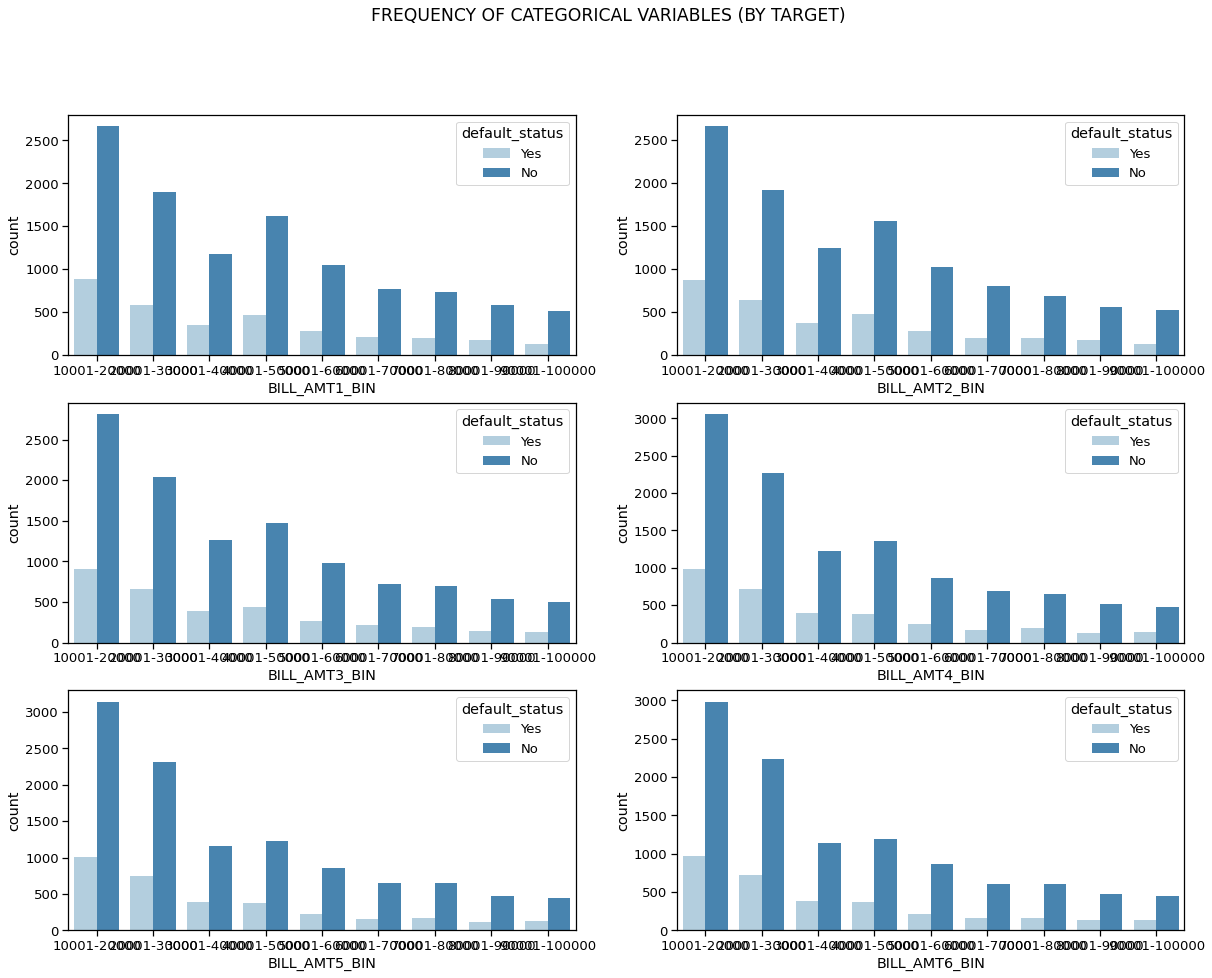

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15), facecolor='white')
fig.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x=df_copy["BILL_AMT1_BIN"], hue="default_status", data=df_copy, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x=df_copy["BILL_AMT2_BIN"], hue="default_status", data=df_copy, palette="Blues", ax=axes[0,1])
ax3 = sns.countplot(x=df_copy["BILL_AMT3_BIN"], hue="default_status", data=df_copy, palette="Blues", ax=axes[1,0])
ax4 = sns.countplot(x=df_copy["BILL_AMT4_BIN"], hue="default_status", data=df_copy, palette="Blues", ax=axes[1,1])
ax5 = sns.countplot(x=df_copy["BILL_AMT5_BIN"], hue="default_status", data=df_copy, palette="Blues", ax=axes[2,0])
ax6 = sns.countplot(x=df_copy["BILL_AMT6_BIN"], hue="default_status", data=df_copy, palette="Blues", ax=axes[2,1])


In [45]:
round((df_copy.groupby(["BILL_AMT1_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
BILL_AMT1_BIN default_status default_status                
10001-20000   No             No                       75.22
              Yes            Yes                      24.78
20001-30000   No             No                       76.44
              Yes            Yes                      23.56
30001-40000   No             No                       77.03
              Yes            Yes                      22.97
40001-50000   No             No                       77.55
              Yes            Yes                      22.45
50001-60000   No             No                       79.46
              Yes            Yes                      20.54
60001-70000   No             No                       78.89
              Yes            Yes                      21.11
70001-80000   No             No                       78.68
              Yes            Yes                      21.32
80001-90000   No             No                       77.38
              Yes            Yes                      22.62
90001-100000  No             No                       80.28
              Yes            Yes                      19.72

In [46]:
round((df_copy.groupby(["BILL_AMT2_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
BILL_AMT2_BIN default_status default_status                
10001-20000   No             No                       75.39
              Yes            Yes                      24.61
20001-30000   No             No                       74.94
              Yes            Yes                      25.06
30001-40000   No             No                       77.27
              Yes            Yes                      22.73
40001-50000   No             No                       76.79
              Yes            Yes                      23.21
50001-60000   No             No                       78.72
              Yes            Yes                      21.28
60001-70000   No             No                       80.20
              Yes            Yes                      19.80
70001-80000   No             No                       77.70
              Yes            Yes                      22.30
80001-90000   No             No                       76.52
              Yes            Yes                      23.48
90001-100000  No             No                       80.75
              Yes            Yes                      19.25

In [47]:
round((df_copy.groupby(["BILL_AMT3_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
BILL_AMT3_BIN default_status default_status                
10001-20000   No             No                       75.76
              Yes            Yes                      24.24
20001-30000   No             No                       75.45
              Yes            Yes                      24.55
30001-40000   No             No                       76.62
              Yes            Yes                      23.38
40001-50000   No             No                       76.97
              Yes            Yes                      23.03
50001-60000   No             No                       79.05
              Yes            Yes                      20.95
60001-70000   No             No                       77.52
              Yes            Yes                      22.48
70001-80000   No             No                       78.30
              Yes            Yes                      21.70
80001-90000   No             No                       78.71
              Yes            Yes                      21.29
90001-100000  No             No                       79.90
              Yes            Yes                      20.10

In [48]:
round((df_copy.groupby(["BILL_AMT4_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
BILL_AMT4_BIN default_status default_status                
10001-20000   No             No                       75.59
              Yes            Yes                      24.41
20001-30000   No             No                       75.91
              Yes            Yes                      24.09
30001-40000   No             No                       75.90
              Yes            Yes                      24.10
40001-50000   No             No                       77.94
              Yes            Yes                      22.06
50001-60000   No             No                       77.24
              Yes            Yes                      22.76
60001-70000   No             No                       80.28
              Yes            Yes                      19.72
70001-80000   No             No                       77.07
              Yes            Yes                      22.93
80001-90000   No             No                       79.97
              Yes            Yes                      20.03
90001-100000  No             No                       77.85
              Yes            Yes                      22.15

In [49]:
round((df_copy.groupby(["BILL_AMT5_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
BILL_AMT5_BIN default_status default_status                
10001-20000   No             No                       75.68
              Yes            Yes                      24.32
20001-30000   No             No                       75.66
              Yes            Yes                      24.34
30001-40000   No             No                       75.03
              Yes            Yes                      24.97
40001-50000   No             No                       76.47
              Yes            Yes                      23.53
50001-60000   No             No                       79.65
              Yes            Yes                      20.35
60001-70000   No             No                       80.86
              Yes            Yes                      19.14
70001-80000   No             No                       79.61
              Yes            Yes                      20.39
80001-90000   No             No                       80.55
              Yes            Yes                      19.45
90001-100000  No             No                       77.28
              Yes            Yes                      22.72

In [50]:
round((df_copy.groupby(["BILL_AMT6_BIN",'default_status']).agg({'default_status':"value_counts"})).groupby(level=0).apply(lambda x:100 * x / float(x.sum())),2)

default_status
BILL_AMT6_BIN default_status default_status                
10001-20000   No             No                       75.40
              Yes            Yes                      24.60
20001-30000   No             No                       75.53
              Yes            Yes                      24.47
30001-40000   No             No                       75.10
              Yes            Yes                      24.90
40001-50000   No             No                       76.33
              Yes            Yes                      23.67
50001-60000   No             No                       80.26
              Yes            Yes                      19.74
60001-70000   No             No                       79.55
              Yes            Yes                      20.45
70001-80000   No             No                       79.14
              Yes            Yes                      20.86
80001-90000   No             No                       77.87
              Yes            Yes                      22.13
90001-100000  No             No                       77.16
              Yes            Yes                      22.84

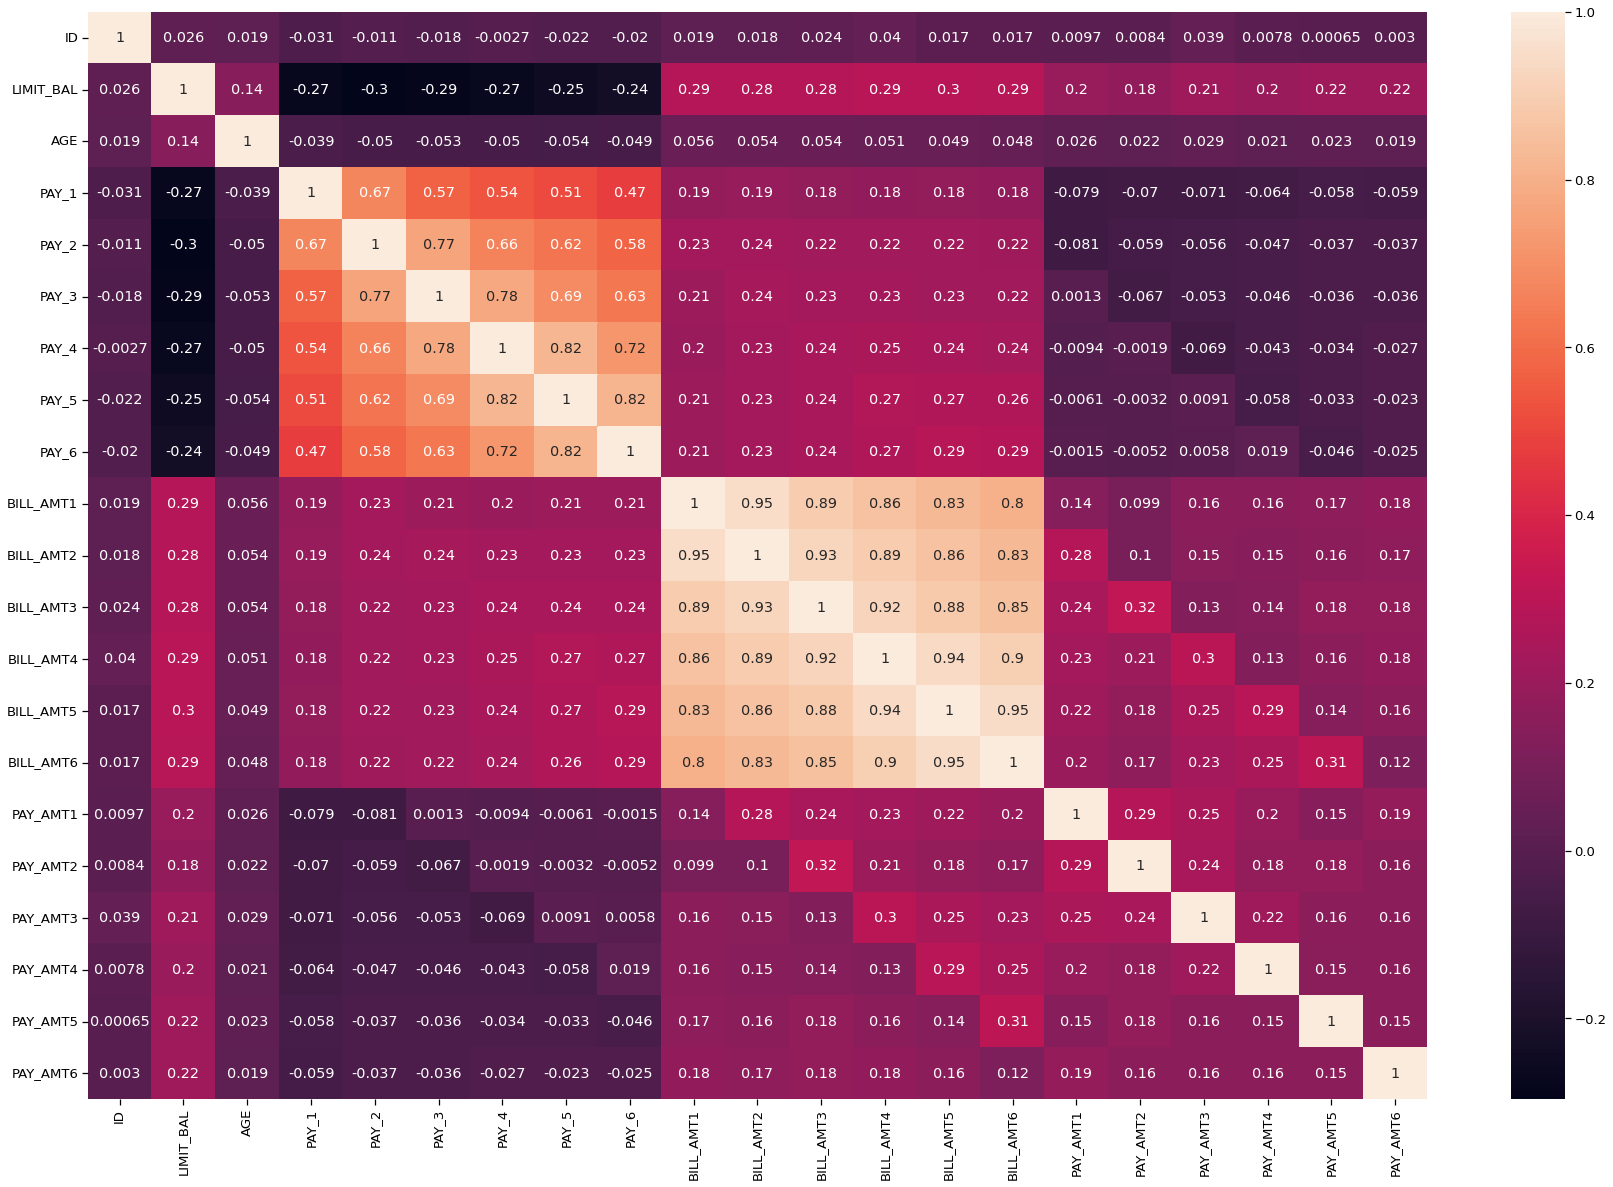

In [51]:
plt.subplots(figsize=(30,20))
sns.heatmap(df_copy.corr(), annot=True)
plt.show()

# Feature Engineering

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


As we see from the data, the columns SEX, EDUCATION and MARRIAGE are coded with numeric values. It looks like a hirerachy given to these values. How ever it would be better to replace with these columns with actual strings and then perform one hot encoding so that the values provided in the columns doesnt impact the model

In [53]:
df['MARRIAGE'] = df['MARRIAGE'].replace([0], [3])
df['EDUCATION'] = df['EDUCATION'].replace([0,6], [2,5])

In [54]:
df['SEX'] = df['SEX'].replace([1,2], ["Male", "Female"])
df['EDUCATION'] = df['EDUCATION'].replace([1,2,3,4,5], ["graduate school", "university","high school","others","unknown"])
df['MARRIAGE'] = df['MARRIAGE'].replace([1,2,3], ["Married", "Single", "Others"])

We will be going with onehot encoding for the columns SEX, EDUCATION and MARRIAGE

In [55]:
df = pd.get_dummies(df, columns=["SEX"])
df = pd.get_dummies(df, columns=["EDUCATION"])
df = pd.get_dummies(df, columns=["MARRIAGE"])

We will be dropping the ID columns as it doesnt have much significance in influencing the target variable

In [56]:
df.drop("ID", inplace = True, axis = 1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LIMIT_BAL                  30000 non-null  float64
 1   AGE                        30000 non-null  int64  
 2   PAY_1                      30000 non-null  int64  
 3   PAY_2                      30000 non-null  int64  
 4   PAY_3                      30000 non-null  int64  
 5   PAY_4                      30000 non-null  int64  
 6   PAY_5                      30000 non-null  int64  
 7   PAY_6                      30000 non-null  int64  
 8   BILL_AMT1                  30000 non-null  float64
 9   BILL_AMT2                  30000 non-null  float64
 10  BILL_AMT3                  30000 non-null  float64
 11  BILL_AMT4                  30000 non-null  float64
 12  BILL_AMT5                  30000 non-null  float64
 13  BILL_AMT6                  30000 non-null  flo

Now I will be spliiting the data into Target and Features

In [58]:
target = df['default_status']
features = df.drop('default_status', axis=1)
data_final = pd.concat([features, target], axis=1)

# Building the Model

In [59]:
train_y, test_y, train_x, test_x = train_test_split(target, features, test_size=0.3)

Logistic Regression Model

In [60]:
accuracy={}
modellr = LogisticRegression()
modellr.fit(train_x, train_y)

train_pred_lr = modellr.predict(train_x)
test_pred_lr = modellr.predict(test_x)

print(classification_report(train_pred_lr, train_y))
print('\nAccuracy Score for Logistic Regression Model (training): ', round(accuracy_score(train_pred_lr, train_y), 2))

print(classification_report(test_pred_lr, test_y))
print('\nAccuracy Score for Logistic Regression Model (testing): ', round(accuracy_score(test_pred_lr, test_y),2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      0.78      0.88     20995
           1       0.00      0.60      0.00         5

    accuracy                           0.78     21000
   macro avg       0.50      0.69      0.44     21000
weighted avg       1.00      0.78      0.87     21000


Accuracy Score for Logistic Regression Model (training):  0.78
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      8998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      9000
   macro avg       0.50      0.39      0.44      9000
weighted avg       1.00      0.78      0.88      9000


Accuracy Score for Logistic Regression Model (testing):  0.78


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

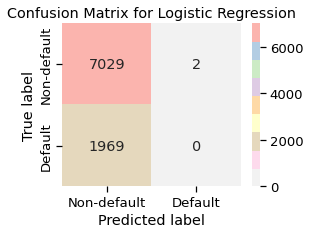

In [61]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, modellr.predict(test_x))
sns.heatmap(ConfMatrix, annot=True, cmap="Pastel1_r", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Logistic Regression")

We got accuracy score of 0.78 for logistic regression model

KNN

In [62]:
#Standardizing the data
sc = StandardScaler()
std_data = sc.fit_transform(train_x)

In [63]:
#splitting the data into test and train
std_data_train = pd.DataFrame(std_data, columns=train_x.columns, index = train_x.index )
std_data_test = pd.DataFrame(sc.transform(test_x), columns=test_x.columns, index = test_x.index )

In [64]:
# hyper parameter tuning
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
modelknn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
modelknn = modelknn.fit(std_data_train, train_y)

In [65]:
round(modelknn.best_score_,2)

0.78

In [66]:
modelknn.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [67]:
#predicting
train_pred_knn = modelknn.predict(std_data_train)
test_pred_knn = modelknn.predict(std_data_test)

In [68]:
print(metrics.classification_report(train_y, train_pred_knn))
print('\nAccuracy Score for KNN Model(training): ', accuracy_score(train_pred_knn, train_y))

print(metrics.classification_report(test_y, test_pred_knn))
print('\nAccuracy Score for KNN Model(testing): ', round(accuracy_score(test_pred_knn, test_y),2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16333
           1       1.00      1.00      1.00      4667

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Accuracy Score for KNN Model(training):  0.9995238095238095
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7031
           1       0.60      0.33      0.43      1969

    accuracy                           0.81      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.78      0.81      0.78      9000


Accuracy Score for KNN Model(testing):  0.81


Text(0.5, 1.0, 'Confusion Matrix for KNN')

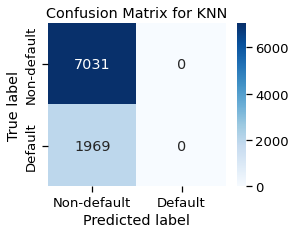

In [69]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, modelknn.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for KNN")

Decission Tree

In [70]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [71]:
dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
dt.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [72]:
round(dt.best_score_,2)

0.81

In [73]:
dt.best_params_

{'max_depth': 4, 'max_features': 4}

In [74]:
#training the model with best hyper parameters
dt_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
dt_tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3, max_features=4)

In [75]:
train_pred_dt = dt_tree.predict(train_x)
test_pred_dt = dt_tree.predict(test_x)

In [76]:
print(metrics.classification_report(train_y, train_pred_dt))
print('\nAccuracy Score for Decission Tree Model(training): ', round(accuracy_score(train_pred_dt, train_y),2))

print(metrics.classification_report(test_y, test_pred_dt))
print('\nAccuracy Score for Decission Tree Model(testing): ', round(accuracy_score(test_pred_dt, test_y),2))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     16333
           1       0.76      0.08      0.15      4667

    accuracy                           0.79     21000
   macro avg       0.78      0.54      0.52     21000
weighted avg       0.78      0.79      0.72     21000


Accuracy Score for Decission Tree Model(training):  0.79
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7031
           1       0.74      0.08      0.15      1969

    accuracy                           0.79      9000
   macro avg       0.77      0.54      0.51      9000
weighted avg       0.78      0.79      0.72      9000


Accuracy Score for Decission Tree Model(testing):  0.79


Text(0.5, 1.0, 'Confusion Matrix for Decission Tree')

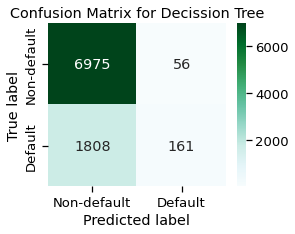

In [77]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, dt_tree.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="BuGn", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Decission Tree")

Naive Bayes

In [78]:
nb_clf = GaussianNB()
nb_clf.fit(train_x, train_y)

GaussianNB()

In [79]:
train_pred_NB=nb_clf.predict(train_x)
test_pred_NB=nb_clf.predict(test_x)

In [80]:
print(metrics.classification_report(train_y, train_pred_NB))
print('\nAccuracy Score for Naive Bayes Model(training): ', accuracy_score(train_pred_NB, train_y))

print(metrics.classification_report(test_y, test_pred_NB))
print('\nAccuracy Score for Naive Bayes Model(testing): ', accuracy_score(train_pred_NB, train_y))

              precision    recall  f1-score   support

           0       0.87      0.26      0.41     16333
           1       0.25      0.87      0.39      4667

    accuracy                           0.40     21000
   macro avg       0.56      0.56      0.40     21000
weighted avg       0.73      0.40      0.40     21000


Accuracy Score for Naive Bayes Model(training):  0.3973809523809524
              precision    recall  f1-score   support

           0       0.88      0.27      0.42      7031
           1       0.25      0.87      0.39      1969

    accuracy                           0.40      9000
   macro avg       0.57      0.57      0.40      9000
weighted avg       0.75      0.40      0.41      9000


Accuracy Score for Naive Bayes Model(testing):  0.3973809523809524


Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
rf_clf.fit( train_x, train_y )

RandomForestClassifier(max_depth=10, max_features=4, n_jobs=-1, oob_score=True)

In [82]:
train_pred_RF=rf_clf.predict(train_x)
test_pred_RF=rf_clf.predict(test_x)

In [83]:
print(metrics.classification_report(train_y, train_pred_RF))
print('\nAccuracy Score for Random Forest Model(training): ', round(accuracy_score(train_pred_RF, train_y),2))

print(metrics.classification_report(test_y, test_pred_RF))
print('\nAccuracy Score for Random Forest Model(testing): ', round(accuracy_score(test_pred_RF, test_y),2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     16333
           1       0.84      0.44      0.58      4667

    accuracy                           0.86     21000
   macro avg       0.85      0.71      0.75     21000
weighted avg       0.85      0.86      0.84     21000


Accuracy Score for Random Forest Model(training):  0.86
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7031
           1       0.67      0.36      0.46      1969

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for Random Forest Model(testing):  0.82


Text(0.5, 1.0, 'Confusion Matrix for Decission Tree')

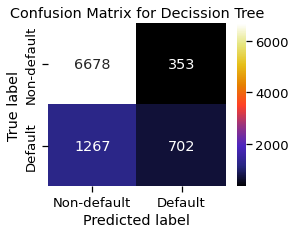

In [84]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, rf_clf.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="CMRmap", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Decission Tree")

In [85]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_x, train_y)

XGBClassifier()

In [86]:
train_pred_xgb=xgb_clf.predict(train_x)
test_pred_xgb=xgb_clf.predict(test_x)

In [87]:
print(metrics.classification_report(train_y, train_pred_xgb))
print('\nAccuracy Score for model6(training): ', round(accuracy_score(train_pred_xgb, train_y),2))

print(metrics.classification_report(test_y, test_pred_xgb))
print('\nAccuracy Score for model6(testing): ', round(accuracy_score(test_pred_xgb, test_y),2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16333
           1       0.70      0.37      0.48      4667

    accuracy                           0.82     21000
   macro avg       0.77      0.66      0.69     21000
weighted avg       0.81      0.82      0.80     21000


Accuracy Score for model6(training):  0.82
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7031
           1       0.67      0.37      0.48      1969

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model6(testing):  0.82


Text(0.5, 1.0, 'Confusion Matrix for Decission Tree')

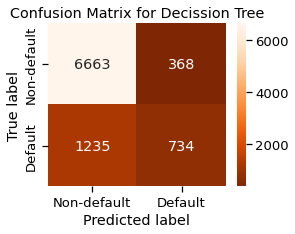

In [88]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, xgb_clf.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="Oranges_r", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Decission Tree")

In [89]:
lr=accuracy_score(test_pred_lr, test_y)*100
knn=accuracy_score(test_pred_knn, test_y)*100
dt=accuracy_score(test_pred_dt, test_y)*100
rf=accuracy_score(test_pred_RF, test_y)*100
nb=accuracy_score(test_pred_NB, test_y)*100
xgb=accuracy_score(test_pred_xgb, test_y)*100

lr1=accuracy_score(train_pred_lr, train_y)*100
knn1=accuracy_score(train_pred_knn, train_y)*100
dt1=accuracy_score(train_pred_dt, train_y)*100
rf1=accuracy_score(train_pred_RF, train_y)*100
nb1=accuracy_score(train_pred_NB, train_y)*100
xgb=accuracy_score(train_pred_xgb, train_y)*100

In [90]:
dict_train={"Logistic Regression":lr1, "KNN":knn1, "Decision Tree":dt1, "Random Forest":rf1, "Naive Bayes":nb1, "XGBoost Classifier": xgb}
dict_test={"Logistic Regression":lr, "KNN":knn, "Decision Tree":dt, "Random Forest":rf, "Naive Bayes":nb, "XGBoost Classifier": xgb}

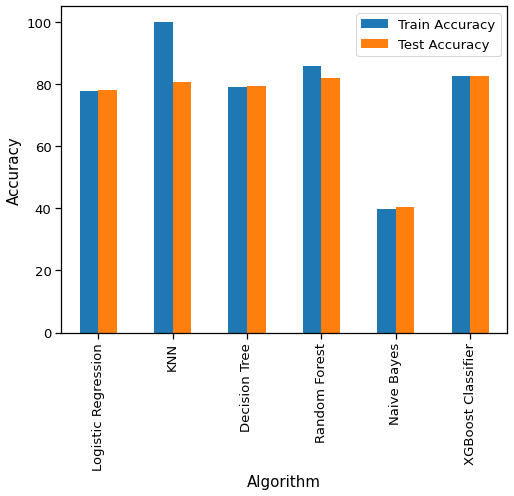

In [91]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

We can observe that both Random Forest and xgboost are giving good accuracy score's for test data which around 0.82